# The Sparks Foundation

## **Simple Linear Regression**

### Task: 
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading and Reading the data
df = pd.read_csv("data1.csv", encoding='latin-1')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking if the data needs any cleaning :

In [3]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


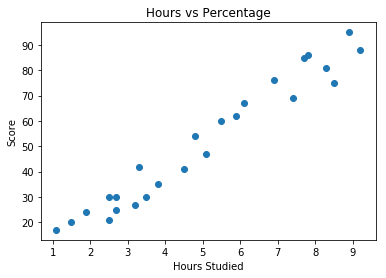

In [5]:
# Plotting a scatter plot for simple visualization
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.scatter(df[['Hours']],df[['Scores']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192B76B6E10>,
      dtype=object)

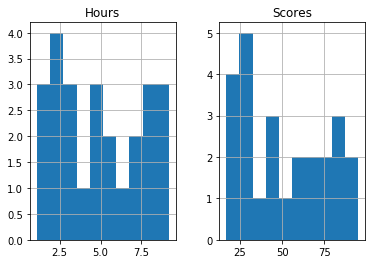

In [6]:
#checking for outliers
df.hist()

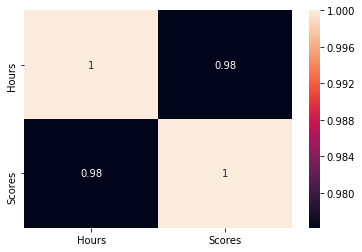

In [7]:
#checking for outliers
sb.heatmap(df.corr(), annot=True)

Hours        AxesSubplot(0.125,0.536818;0.352273x0.343182)
Scores    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
dtype: object

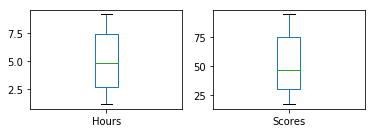

In [8]:
#checking for outliers
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

#### Since, the data is already clean w no outliers or missing entries so we can proceed w preparing the data.

### Training the algorithm

In [9]:
X = df[['Hours']].values
Y = df[['Scores']].values
linReg = LinearRegression()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [11]:
linReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = linReg.predict(X_test)

In [13]:
X_test[:10]

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
# Predicted Scores
y_pred[:10]

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [15]:
df['predicted_scores'] = linReg.predict(df[['Hours']])

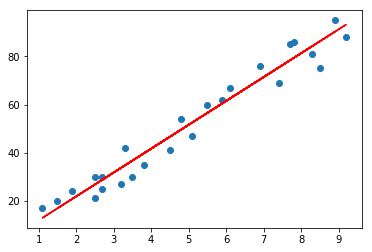

In [16]:
# Plotting for the test data
plt.scatter(df[['Hours']],df[['Scores']])
plt.plot(df[['Hours']], df[['predicted_scores']], color='r')

### Making Predictions

In [17]:
#Checking Accuracy
linReg.score(X_test,Y_test)

0.9454906892105356

In [21]:
user_input = float(input("Enter number of Hours: "))
print("The predicted Score is",linReg.predict([[user_input]])[0][0])

Enter number of Hours: 9.25
The predicted Score is 93.69173248737538


### Evaluating the model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


## Submitted By: Tushar Bose